# Module Initialization
Here we will load all data and relevant modules. This will access helpful utilities aswell.

In [1]:
import scipy.misc
from scipy import signal
from scipy.fftpack import fft, fftshift, ifft
from scipy.fftpack import fftfreq
import numpy as np 
import matplotlib.pyplot as plt
from utils.utils import *
from utils.preprocess import *

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from utils.utils import *
from utils.preprocess import *
from nn.rnn import *
from nn.cnn import *
from nn.cnn_lstm import *
from nn.cnn_gru import *
from nn.solver import *
import torch, torchaudio, torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable 
import copy
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [3]:
#for macOS
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")
person_train_valid = np.load("person_train_valid.npy")
X_train_valid = np.load("X_train_valid.npy")
y_train_valid = np.load("y_train_valid.npy")
person_test = np.load("person_test.npy")

X_test_cpy =copy.deepcopy( X_test)
y_test_cpy =copy.deepcopy( y_test)
person_train_valid_cpy =copy.deepcopy( person_train_valid)
X_train_valid_cpy =copy.deepcopy( X_train_valid)
y_train_valid_cpy =copy.deepcopy( y_train_valid)
person_test_cpy =copy.deepcopy( person_test)

static_X_test = np.load("X_test.npy")
static_y_test = np.load("y_test.npy")
static_y_test -= 769
static_X_train_valid = np.load("X_train_valid.npy")
static_y_train_valid = np.load("y_train_valid.npy") 
static_y_train_valid -= 769


In [ ]:
# If data in ./data/project
X_test = np.load(add_path("X_test.npy"))
y_test = np.load(add_path("y_test.npy"))
person_train_valid = np.load(add_path("person_train_valid.npy"))
X_train_valid = np.load(add_path("X_train_valid.npy"))
y_train_valid = np.load(add_path("y_train_valid.npy"))
person_test = np.load(add_path("person_test.npy"))
X_test_cpy =copy.deepcopy( X_test)
y_test_cpy =copy.deepcopy( y_test)
person_train_valid_cpy =copy.deepcopy( person_train_valid)
X_train_valid_cpy =copy.deepcopy( X_train_valid)
y_train_valid_cpy =copy.deepcopy( y_train_valid)
person_test_cpy =copy.deepcopy( person_test)

Check the shape of our data

In [24]:
print('Training/Valid data shape: {}'.format(X_train_valid.shape))
print('Test data shape: {}'.format(X_test.shape))
print('Training/Valid Target shape: {}'.format(y_train_valid.shape))
print('Test Target shape: {}'.format(y_test.shape))
print('Person Train/Valid shape: {}'.format(person_train_valid.shape))
print('Person Test shape: {}'.format(person_test.shape))


Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid Target shape: (2115,)
Test Target shape: torch.Size([1772, 1])
Person Train/Valid shape: (2115, 1)
Person Test shape: (1772, 1)


# Data Preprocessing

Here we will perfrom some data preprocessing to create a larger dataset and improve the generalization of our network.

## Outline
**Describe the preprocessing that will be done**

In [4]:
# THIS CELL ALONE WILL DO ALL PREPROCESSING
# Do all preprocessing and pair patient labels
person_test,x_test,y_test,person_valid,x_valid,y_valid,person_train, x_train, y_train = std_preprocess_EEG(
    X_test = X_test,
    y_test = y_test,
    person_train_valid = person_train_valid,
    X_train_valid = X_train_valid,
    y_train_valid = y_train_valid,
    person_test = person_test,
    val_size = 5000)
print('Training data shape: {}'.format(x_train.shape))
print('Validation data shape: {}'.format(x_valid.shape))
print('Test data shape: {}'.format(x_test.shape))
print('Training Target shape: {}'.format(y_train.shape))
print('Validation Target shape: {}'.format(y_valid.shape))
print('Test Target shape: {}'.format(y_test.shape))
print('Person Train shape: {}'.format(person_train.shape))
print('Person Validation shape: {}'.format(person_valid.shape))
print('Person Test shape: {}'.format(person_test.shape))

Training data shape: torch.Size([3460, 22, 250])
Validation data shape: torch.Size([5000, 22, 250])
Test data shape: torch.Size([1772, 22, 250])
Training Target shape: torch.Size([3460, 1])
Validation Target shape: torch.Size([5000, 1])
Test Target shape: torch.Size([1772, 1])
Person Train shape: (3460, 1)
Person Validation shape: (5000, 1)
Person Test shape: (1772, 1)


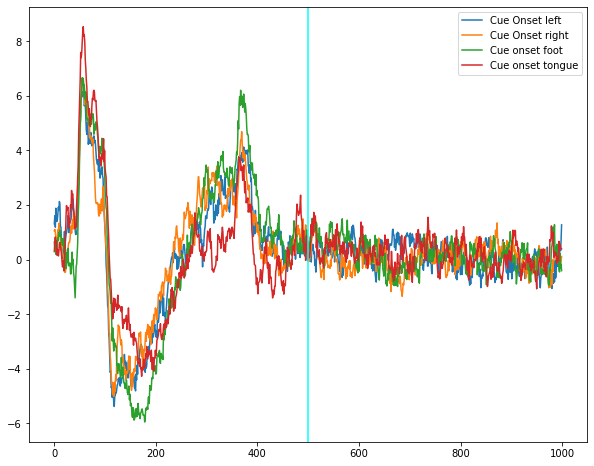

In [5]:
#y_train_valid -= 769
#y_test -= 769

## Visualizing the data

ch_data = X_train_valid[:,8,:]


class_0_ind = np.where(y_train_valid == 0)
ch_data_class_0 = ch_data[class_0_ind]
avg_ch_data_class_0 = np.mean(ch_data_class_0,axis=0)


class_1_ind = np.where(y_train_valid == 1)
ch_data_class_1 = ch_data[class_1_ind]
avg_ch_data_class_1 = np.mean(ch_data_class_1,axis=0)

class_2_ind = np.where(y_train_valid == 2)
ch_data_class_2 = ch_data[class_2_ind]
avg_ch_data_class_2 = np.mean(ch_data_class_2,axis=0)

class_3_ind = np.where(y_train_valid == 3)
ch_data_class_3 = ch_data[class_3_ind]
avg_ch_data_class_3 = np.mean(ch_data_class_3,axis=0)


plt.plot(np.arange(1000),avg_ch_data_class_0)
plt.plot(np.arange(1000),avg_ch_data_class_1)
plt.plot(np.arange(1000),avg_ch_data_class_2)
plt.plot(np.arange(1000),avg_ch_data_class_3)
plt.axvline(x=500, label='line at t=500',c='cyan')

plt.legend(["Cue Onset left", "Cue Onset right", "Cue onset foot", "Cue onset tongue"])

In [6]:
def data_filter(X_train_valid,X_test):
    num_fft=500
    X_train_valid_denoise=np.zeros(X_train_valid.shape)
    X_test_denoise=np.zeros(X_test.shape)
#define filter
    filter_denoise=scipy.signal.firwin(1001,[0.4,0.48],pass_zero='bandstop')
    for i in range(X_train_valid.shape[1]):
        for j in range(X_train_valid.shape[0]):
            X_train_valid_denoise[j,i,:]=scipy.signal.convolve(X_train_valid[j,i,:],filter_denoise,mode='same')
    for i in range(X_test.shape[1]):
        for j in range(X_test.shape[0]):
            X_test_denoise[j,i,:]=scipy.signal.convolve(X_test[j,i,:],filter_denoise,mode='same')
    return X_train_valid_denoise,X_test_denoise

In [7]:
X_train_valid_denoise,X_test_denoise = data_filter(X_train_valid_cpy, X_test_cpy)
print('Training/Valid data shape: {}'.format(X_train_valid_denoise.shape))
print('Test data shape: {}'.format(X_test_denoise.shape))

Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)


In [8]:
# Do all preprocessing and pair patient labels
person_test_den,x_test_den,y_test_den,person_valid_den,x_valid_den,y_valid_den,person_train_den, x_train_den, y_train_den= std_preprocess_EEG(
    X_test = X_test_denoise,
    y_test = y_test_cpy,
    person_train_valid = person_train_valid_cpy,
    X_train_valid = X_train_valid_denoise,
    y_train_valid = y_train_valid_cpy,
    person_test = person_test_cpy,
    val_size = 5000)
print('Denoised Training data shape: {}'.format(x_train_den.shape))
print('Denoised Validation data shape: {}'.format(x_valid_den.shape))
print('Denoised Test data shape: {}'.format(x_test_den.shape))
print('Denoised Training Target shape: {}'.format(y_train_den.shape))
print('Denoised Validation Target shape: {}'.format(y_valid_den.shape))
print('Denoised Test Target shape: {}'.format(y_test_den.shape))
print('Denoised Person Train shape: {}'.format(person_train_den.shape))
print('Denoised Person Validation shape: {}'.format(person_valid_den.shape))
print('Denoised Person Test shape: {}'.format(person_test_den.shape))

Denoised Training data shape: torch.Size([3460, 22, 250])
Denoised Validation data shape: torch.Size([5000, 22, 250])
Denoised Test data shape: torch.Size([1772, 22, 250])
Denoised Training Target shape: torch.Size([3460, 1])
Denoised Validation Target shape: torch.Size([5000, 1])
Denoised Test Target shape: torch.Size([1772, 1])
Denoised Person Train shape: (3460, 1)
Denoised Person Validation shape: (5000, 1)
Denoised Person Test shape: (1772, 1)


In [9]:
X_train_valid_prep,y_train_valid_prep = data_prep(X_train_valid,y_train_valid,2,2,True, 0, 500)

In [ ]:
# to_categorical is a tensorflow command so here it is in python
def to_categorical(y, num_classes):
    """ 1-hot encodes a tensor """
    return np.eye(num_classes, dtype='uint8')[y]

In [ ]:
#Possible augmentations
# Create Data set with gaussian noise
std_data = np.std(X_train_valid)
X_train_valid_gn = np.random.randn(*X_train_valid.shape)*std_data/10 +X_train_valid

# Create data set with single sample shift
X_train_valid_delay = np.roll(X_train_valid,1,axis=2)

# Create data set that is scaled 
X_train_valid_half = X_train_valid/2

# Hyperparameter Tuning

In this section, we tuned our hyperparameters for each network to achieve best performance. We have commented out the hyperparameters that were tested out for each network.

## CNN


In [10]:
num_epochs = 50 #epochs tested: 3, 5, 10, 20, 30, 50, 60
learning_rate = 0.001 #lrs tested: 0.01, 0.001, 0.0001,0.00001

# hyperparameters for LSTM
input_size = 250 #number of features 
hidden_size = 128 #number of features in hidden state
num_layers = 1 #number of stacked lstm layers 

# class and batch size
num_classes = 4 #number of output classes 
batch_size = 64 

In [11]:
# Create Torch Iterables
train_dataset = torch.utils.data.TensorDataset(x_train, y_train)
valid_dataset = torch.utils.data.TensorDataset(x_valid, y_valid)
test_dataset  = torch.utils.data.TensorDataset(x_test, y_test)
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
validloader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)


In [12]:
cnn = CNN(num_classes, input_size, hidden_size, num_layers, x_train.shape[1])
criterion = torch.nn.CrossEntropyLoss()   # CE Loss is our softmax
optimizer = torch.optim.Adam(cnn.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9) #lr decays tested: 0.9, 0.95, 0.99

In [13]:
solver = Solver(num_epochs, cnn, optimizer, scheduler, criterion, verbose=True )
solver.train(trainloader, validloader)
solver.test(testloader)

Epoch: 0, loss: 1.49936
  Val Accuracy: 0.37300
Epoch: 1, loss: 1.33381
  Val Accuracy: 0.42120
Epoch: 2, loss: 1.25538
  Val Accuracy: 0.46020
Epoch: 3, loss: 1.19700
  Val Accuracy: 0.48760
Epoch: 4, loss: 1.12809
  Val Accuracy: 0.50020
Epoch: 5, loss: 1.11030
  Val Accuracy: 0.52440
Epoch: 6, loss: 1.05714
  Val Accuracy: 0.54180
Epoch: 7, loss: 1.02995
  Val Accuracy: 0.55080
Epoch: 8, loss: 0.96857
  Val Accuracy: 0.56720
Epoch: 9, loss: 0.96680
  Val Accuracy: 0.57760
Epoch: 10, loss: 0.94100
  Val Accuracy: 0.58040
Epoch: 11, loss: 0.90548
  Val Accuracy: 0.59340
Epoch: 12, loss: 0.87863
  Val Accuracy: 0.59740
Epoch: 13, loss: 0.86457
  Val Accuracy: 0.60720
Epoch: 14, loss: 0.84471
  Val Accuracy: 0.61000
Epoch: 15, loss: 0.83908
  Val Accuracy: 0.62720
Epoch: 16, loss: 0.82735
  Val Accuracy: 0.62900
Epoch: 17, loss: 0.80932
  Val Accuracy: 0.63180
Epoch: 18, loss: 0.79365
  Val Accuracy: 0.62560
Epoch: 19, loss: 0.78516
  Val Accuracy: 0.63620
Epoch: 20, loss: 0.77491
  Val

0.5756207674943566

In [ ]:
plt.subplot(3, 1, 1)
plt.title('Training and validation loss for CNN')
plt.xlabel('Epoch')
plt.subplot(3, 1, 1)
plt.plot(solver.loss_history, label='training')
plt.plot(solver.val_loss_history, label='validation')
plt.legend(["train", "val"])

## LSTM

In [ ]:
num_epochs = 50 #epochs tested: 3, 5, 10, 20, 30, 50, 60
learning_rate = 0.0001 #lrs tested: 0.01, 0.001, 0.0001,0.00001

# hyperparameters for LSTM
input_size = 250 #number of features tested: 250, 1000
hidden_size = 128 #number of features in hidden state tested: 16,32,64,128,250
num_layers = 1 #number of stacked lstm layers tested: 1,2,4,6

# class and batch size
num_classes = 4 #number of output classes 
batch_size = 64 

In [ ]:
lstm = RNN(num_classes, input_size, hidden_size, num_layers, x_train.shape[1])
criterion = torch.nn.CrossEntropyLoss()   # CE Loss is our softmax
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9) #lr decays tested: 0.9, 0.95, 0.99


In [ ]:
solver = Solver(num_epochs, lstm, optimizer, scheduler, criterion, verbose=True,cnn_reshape=False)
solver.train(trainloader, validloader)
solver.test(testloader)

In [ ]:
plt.subplot(3, 1, 1)
plt.title('Training and validation loss for LSTM')
plt.xlabel('Epoch')
plt.subplot(3, 1, 1)
plt.plot(solver.loss_history, label='training')
plt.plot(solver.val_loss_history, label='validation')
plt.legend(["train", "val"])


## CNN_LSTM

In [ ]:
num_epochs = 50 #epochs tested: 3, 5, 10, 20, 30, 50, 60
learning_rate = 0.001 #lrs tested: 0.01, 0.001, 0.0001,0.00001

# hyperparameters for LSTM
input_size = 250 #number of features tested: 250, 1000
hidden_size = 128 #number of features in hidden state tested: 16,32,64,128,250
num_layers = 1 #number of stacked lstm layers tested: 1,2,4,6

# class and batch size
num_classes = 4 #number of output classes 
batch_size = 64 

In [ ]:
cnn_lstm = CNN_LSTM(num_classes, input_size, hidden_size, num_layers, x_train.shape[1])
criterion = torch.nn.CrossEntropyLoss()   # CE Loss is our softmax
optimizer = torch.optim.Adam(cnn_lstm.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9) #lr decays tested: 0.9, 0.95, 0.99

In [ ]:
solver = Solver(num_epochs, cnn_lstm, optimizer, scheduler, criterion, verbose=True)
solver.train(trainloader, validloader)
solver.test(testloader)

In [ ]:
plt.subplot(3, 1, 1)
plt.title('Training and validation loss for CNN-LSTM')
plt.xlabel('Epoch')
plt.subplot(3, 1, 1)
plt.plot(solver.loss_history, label='training')
plt.plot(solver.val_loss_history, label='validation')
plt.legend(["train", "val"])

## Single Subject Classification

For this objective we are looking at how a model performs when trained on the dataset of each subject 

We test each model (RNN LSTM, CNN, CNN + LSTM)

In [14]:
# Set new parameters here for single subject classification
num_epochs = 50 #epochs 
learning_rate = 0.001 #lr

input_size = 250 #number of features 
hidden_size = 128 #number of features in hidden state
num_layers = 1 #number of stacked lstm layers 

num_classes = 4 #number of output classes 
batch_size = 64 

### Single Subject Classification with CNN

Epoch: 0, loss: 1.65550
  Val Accuracy: 0.28692
Epoch: 1, loss: 1.50600
  Val Accuracy: 0.32911
Epoch: 2, loss: 1.49852
  Val Accuracy: 0.32068
Epoch: 3, loss: 1.52339
  Val Accuracy: 0.29958
Epoch: 4, loss: 1.30270
  Val Accuracy: 0.31646
Epoch: 5, loss: 1.39456
  Val Accuracy: 0.34599
Epoch: 6, loss: 1.42032
  Val Accuracy: 0.30802
Epoch: 7, loss: 1.40092
  Val Accuracy: 0.33333
Epoch: 8, loss: 1.33599
  Val Accuracy: 0.35865
Epoch: 9, loss: 1.42567
  Val Accuracy: 0.32068
Epoch: 10, loss: 1.31159
  Val Accuracy: 0.35443
Epoch: 11, loss: 1.28096
  Val Accuracy: 0.32068
Epoch: 12, loss: 1.34558
  Val Accuracy: 0.32489
Epoch: 13, loss: 1.38374
  Val Accuracy: 0.30380
Epoch: 14, loss: 1.22758
  Val Accuracy: 0.27426
Epoch: 15, loss: 1.19059
  Val Accuracy: 0.34177
Epoch: 16, loss: 1.21973
  Val Accuracy: 0.31646
Epoch: 17, loss: 1.21096
  Val Accuracy: 0.30380
Epoch: 18, loss: 1.25823
  Val Accuracy: 0.40928
Epoch: 19, loss: 1.24442
  Val Accuracy: 0.34177
Epoch: 20, loss: 1.19606
  Val

  Val Accuracy: 0.38889
Epoch: 13, loss: 1.14098
  Val Accuracy: 0.36752
Epoch: 14, loss: 1.15362
  Val Accuracy: 0.38462
Epoch: 15, loss: 1.09418
  Val Accuracy: 0.35043
Epoch: 16, loss: 1.14651
  Val Accuracy: 0.39316
Epoch: 17, loss: 1.09570
  Val Accuracy: 0.35043
Epoch: 18, loss: 1.11695
  Val Accuracy: 0.32051
Epoch: 19, loss: 1.10752
  Val Accuracy: 0.40598
Epoch: 20, loss: 1.10001
  Val Accuracy: 0.33333
Epoch: 21, loss: 1.11652
  Val Accuracy: 0.35470
Epoch: 22, loss: 1.11473
  Val Accuracy: 0.38889
Epoch: 23, loss: 1.11077
  Val Accuracy: 0.38034
Epoch: 24, loss: 1.10200
  Val Accuracy: 0.40171
Epoch: 25, loss: 1.02882
  Val Accuracy: 0.38034
Epoch: 26, loss: 1.13442
  Val Accuracy: 0.38034
Epoch: 27, loss: 1.15122
  Val Accuracy: 0.38034
Epoch: 28, loss: 1.13760
  Val Accuracy: 0.34615
Epoch: 29, loss: 1.08764
  Val Accuracy: 0.40171
Epoch: 30, loss: 1.09226
  Val Accuracy: 0.38462
Epoch: 31, loss: 1.09860
  Val Accuracy: 0.37179
Epoch: 32, loss: 1.07738
  Val Accuracy: 0.44

  Val Accuracy: 0.36134
Epoch: 25, loss: 1.16548
  Val Accuracy: 0.35294
Epoch: 26, loss: 1.12456
  Val Accuracy: 0.38235
Epoch: 27, loss: 1.10760
  Val Accuracy: 0.33613
Epoch: 28, loss: 1.06086
  Val Accuracy: 0.39076
Epoch: 29, loss: 1.11364
  Val Accuracy: 0.37395
Epoch: 30, loss: 1.08497
  Val Accuracy: 0.36134
Epoch: 31, loss: 1.04833
  Val Accuracy: 0.36975
Epoch: 32, loss: 1.15222
  Val Accuracy: 0.34454
Epoch: 33, loss: 1.06332
  Val Accuracy: 0.38655
Epoch: 34, loss: 1.07031
  Val Accuracy: 0.37395
Epoch: 35, loss: 1.04476
  Val Accuracy: 0.36134
Epoch: 36, loss: 1.06197
  Val Accuracy: 0.40756
Epoch: 37, loss: 1.05610
  Val Accuracy: 0.39916
Epoch: 38, loss: 1.08881
  Val Accuracy: 0.38235
Epoch: 39, loss: 1.04035
  Val Accuracy: 0.34034
Epoch: 40, loss: 1.10589
  Val Accuracy: 0.39916
Epoch: 41, loss: 1.17087
  Val Accuracy: 0.41597
Epoch: 42, loss: 1.09961
  Val Accuracy: 0.35714
Epoch: 43, loss: 1.03824
  Val Accuracy: 0.34454
Epoch: 44, loss: 1.11236
  Val Accuracy: 0.40

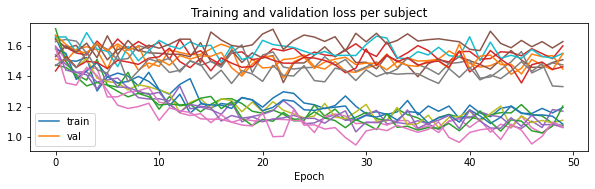

In [15]:
# Train CNN NETWORK on each subject and see how the model for each subject 
# with test dataset from each subject
totalsub = 9
subject_validaccs = []
subject_testaccs = []
for sub in range(0, totalsub):
    train_dataset = torch.utils.data.TensorDataset(x_train[np.where(person_train_valid == sub)[0]], y_train[np.where(person_train_valid == sub)[0]])
    valid_dataset = torch.utils.data.TensorDataset(x_valid[np.where(person_train_valid == sub)[0]], y_valid[np.where(person_train_valid == sub)[0]])
    test_dataset  = torch.utils.data.TensorDataset(x_test[np.where(person_test == sub)[0]], y_test[np.where(person_test == sub)[0]])
    trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
    validloader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
    testloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
    model = CNN(num_classes, input_size, hidden_size, num_layers, x_train.shape[1])
    criterion = torch.nn.CrossEntropyLoss()   # CE Loss is our softmax
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
    solver = Solver(num_epochs, model, optimizer, scheduler, criterion, verbose=True )
    solver.train(trainloader, validloader)
    subject_validaccs.append(solver.val_accuracy_history[-1])
    print("subject " + str(sub+1) + " validation accuracy: %1.5f"% (solver.val_accuracy_history[-1]))
    solver.test(testloader)
    subject_testaccs.append(solver.test_accuracy)
    print("subject " + str(sub+1) + " test accuracy: %1.5f"% (solver.test_accuracy))
    
    plt.subplot(3, 1, 1)
    plt.title('Training and validation loss per subject')
    plt.xlabel('Epoch')
    plt.subplot(3, 1, 1)
    plt.plot(solver.loss_history, label='training')
    plt.plot(solver.val_loss_history, label='validation')
    plt.legend(["train", "val"])


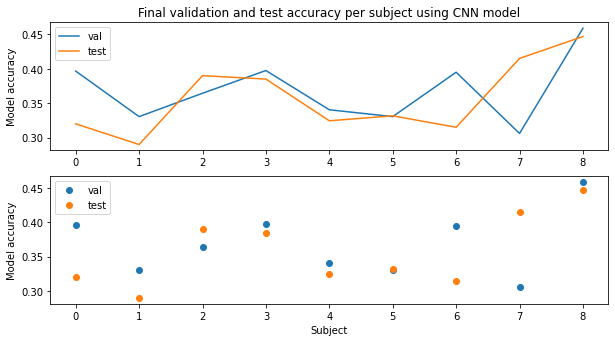

In [16]:
plt.subplot(3, 1, 1)
plt.title('Final validation and test accuracy per subject using CNN model')
plt.ylabel('Model accuracy')
plt.subplot(3, 1, 1)
plt.plot(subject_validaccs, label='val')
plt.plot(subject_testaccs, label='test')
plt.legend(["val", "test"])
plt.subplot(3, 1, 2)
subjectnum = range(0, totalsub)
plt.scatter(subjectnum, subject_validaccs)
plt.scatter(subjectnum, subject_testaccs)
plt.xlabel('Subject')
plt.ylabel('Model accuracy')
plt.legend(["val", "test"])

cnn_subject_validaccs = subject_validaccs.copy()
cnn_subject_testaccs = subject_testaccs.copy()

### Single Subject Classification with LSTM

Epoch: 0, loss: 1.38299
  Val Accuracy: 0.31224
Epoch: 1, loss: 1.16594
  Val Accuracy: 0.32911
Epoch: 2, loss: 1.02030
  Val Accuracy: 0.33333
Epoch: 3, loss: 0.89622
  Val Accuracy: 0.32068
Epoch: 4, loss: 0.80638
  Val Accuracy: 0.35443
Epoch: 5, loss: 0.74339
  Val Accuracy: 0.34599
Epoch: 6, loss: 0.67250
  Val Accuracy: 0.33333
Epoch: 7, loss: 0.61481
  Val Accuracy: 0.31224
Epoch: 8, loss: 0.57548
  Val Accuracy: 0.29958
Epoch: 9, loss: 0.52791
  Val Accuracy: 0.34177
Epoch: 10, loss: 0.48627
  Val Accuracy: 0.35443
Epoch: 11, loss: 0.45456
  Val Accuracy: 0.35021
Epoch: 12, loss: 0.42539
  Val Accuracy: 0.32068
Epoch: 13, loss: 0.40215
  Val Accuracy: 0.32911
Epoch: 14, loss: 0.38345
  Val Accuracy: 0.36287
Epoch: 15, loss: 0.36217
  Val Accuracy: 0.34599
Epoch: 16, loss: 0.34084
  Val Accuracy: 0.34177
Epoch: 17, loss: 0.34477
  Val Accuracy: 0.32489
Epoch: 18, loss: 0.33687
  Val Accuracy: 0.32911
Epoch: 19, loss: 0.30237
  Val Accuracy: 0.35443
Epoch: 20, loss: 0.30473
  Val

  Val Accuracy: 0.35897
Epoch: 13, loss: 0.38727
  Val Accuracy: 0.34188
Epoch: 14, loss: 0.36093
  Val Accuracy: 0.33333
Epoch: 15, loss: 0.35685
  Val Accuracy: 0.34615
Epoch: 16, loss: 0.32922
  Val Accuracy: 0.36325
Epoch: 17, loss: 0.29679
  Val Accuracy: 0.35470
Epoch: 18, loss: 0.30835
  Val Accuracy: 0.35470
Epoch: 19, loss: 0.28914
  Val Accuracy: 0.35043
Epoch: 20, loss: 0.28870
  Val Accuracy: 0.35897
Epoch: 21, loss: 0.27305
  Val Accuracy: 0.33761
Epoch: 22, loss: 0.26685
  Val Accuracy: 0.37179
Epoch: 23, loss: 0.25189
  Val Accuracy: 0.35470
Epoch: 24, loss: 0.25512
  Val Accuracy: 0.33761
Epoch: 25, loss: 0.24713
  Val Accuracy: 0.35470
Epoch: 26, loss: 0.23381
  Val Accuracy: 0.36325
Epoch: 27, loss: 0.24755
  Val Accuracy: 0.36325
Epoch: 28, loss: 0.24253
  Val Accuracy: 0.32479
Epoch: 29, loss: 0.23673
  Val Accuracy: 0.35470
Epoch: 30, loss: 0.22409
  Val Accuracy: 0.35043
Epoch: 31, loss: 0.22048
  Val Accuracy: 0.37607
Epoch: 32, loss: 0.23031
  Val Accuracy: 0.36

  Val Accuracy: 0.39916
Epoch: 25, loss: 0.28785
  Val Accuracy: 0.39076
Epoch: 26, loss: 0.28122
  Val Accuracy: 0.38655
Epoch: 27, loss: 0.28670
  Val Accuracy: 0.39076
Epoch: 28, loss: 0.26318
  Val Accuracy: 0.39916
Epoch: 29, loss: 0.25646
  Val Accuracy: 0.36975
Epoch: 30, loss: 0.25477
  Val Accuracy: 0.39076
Epoch: 31, loss: 0.25474
  Val Accuracy: 0.39916
Epoch: 32, loss: 0.26457
  Val Accuracy: 0.36975
Epoch: 33, loss: 0.25443
  Val Accuracy: 0.36555
Epoch: 34, loss: 0.26671
  Val Accuracy: 0.40756
Epoch: 35, loss: 0.25798
  Val Accuracy: 0.35294
Epoch: 36, loss: 0.25531
  Val Accuracy: 0.39076
Epoch: 37, loss: 0.24756
  Val Accuracy: 0.41176
Epoch: 38, loss: 0.25095
  Val Accuracy: 0.37815
Epoch: 39, loss: 0.24405
  Val Accuracy: 0.36555
Epoch: 40, loss: 0.24702
  Val Accuracy: 0.38655
Epoch: 41, loss: 0.24742
  Val Accuracy: 0.39496
Epoch: 42, loss: 0.24342
  Val Accuracy: 0.39916
Epoch: 43, loss: 0.24019
  Val Accuracy: 0.42017
Epoch: 44, loss: 0.24351
  Val Accuracy: 0.39

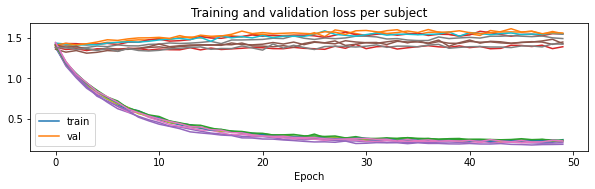

In [17]:
# Change to optimal learning rate of 0.0001 for LSTM
learning_rate = 0.0001 #lr

# Train RNN LSTM NETWORK on each subject and see how the model for each subject 
# with test dataset from each subject
totalsub = 9
subject_validaccs = []
subject_testaccs = []
for sub in range(0, totalsub):
    train_dataset = torch.utils.data.TensorDataset(x_train[np.where(person_train_valid == sub)[0]], y_train[np.where(person_train_valid == sub)[0]])
    valid_dataset = torch.utils.data.TensorDataset(x_valid[np.where(person_train_valid == sub)[0]], y_valid[np.where(person_train_valid == sub)[0]])
    test_dataset  = torch.utils.data.TensorDataset(x_test[np.where(person_test == sub)[0]], y_test[np.where(person_test == sub)[0]])
    trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
    validloader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
    testloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
    model = RNN(num_classes, input_size, hidden_size, num_layers, x_train.shape[1])
    criterion = torch.nn.CrossEntropyLoss()   # CE Loss is our softmax
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
    solver = Solver(num_epochs, model, optimizer, scheduler, criterion, verbose=True, cnn_reshape=False)
    solver.train(trainloader, validloader)
    subject_validaccs.append(solver.val_accuracy_history[-1])
    print("subject " + str(sub+1) + " validation accuracy: %1.5f"% (solver.val_accuracy_history[-1]))
    solver.test(testloader)
    subject_testaccs.append(solver.test_accuracy)
    print("subject " + str(sub+1) + " test accuracy: %1.5f"% (solver.test_accuracy))
    
    plt.subplot(3, 1, 1)
    plt.title('Training and validation loss per subject')
    plt.xlabel('Epoch')
    plt.subplot(3, 1, 1)
    plt.plot(solver.loss_history, label='training')
    plt.plot(solver.val_loss_history, label='validation')
    plt.legend(["train", "val"])

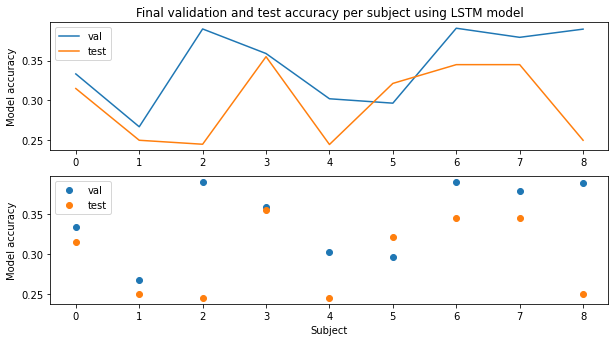

In [18]:
plt.subplot(3, 1, 1)
plt.title('Final validation and test accuracy per subject using LSTM model')
plt.ylabel('Model accuracy')
plt.subplot(3, 1, 1)
plt.plot(subject_validaccs, label='val')
plt.plot(subject_testaccs, label='test')
plt.legend(["val", "test"])
plt.subplot(3, 1, 2)
subjectnum = range(0, totalsub)
plt.scatter(subjectnum, subject_validaccs)
plt.scatter(subjectnum, subject_testaccs)
plt.xlabel('Subject')
plt.ylabel('Model accuracy')
plt.legend(["val", "test"])


lstm_subject_validaccs = subject_validaccs.copy()
lstm_subject_testaccs = subject_testaccs.copy()

### Single Subject Classification with CNN-LSTM

Epoch: 0, loss: 1.76461
  Val Accuracy: 0.29958
Epoch: 1, loss: 1.45363
  Val Accuracy: 0.25738
Epoch: 2, loss: 1.35424
  Val Accuracy: 0.29958
Epoch: 3, loss: 1.36107
  Val Accuracy: 0.29958
Epoch: 4, loss: 1.28314
  Val Accuracy: 0.35443
Epoch: 5, loss: 1.24536
  Val Accuracy: 0.36287
Epoch: 6, loss: 1.13521
  Val Accuracy: 0.40506
Epoch: 7, loss: 1.11619
  Val Accuracy: 0.34177
Epoch: 8, loss: 1.10375
  Val Accuracy: 0.33755
Epoch: 9, loss: 1.08646
  Val Accuracy: 0.37553
Epoch: 10, loss: 1.04152
  Val Accuracy: 0.38397
Epoch: 11, loss: 1.02365
  Val Accuracy: 0.37131
Epoch: 12, loss: 0.94517
  Val Accuracy: 0.33755
Epoch: 13, loss: 1.06857
  Val Accuracy: 0.37553
Epoch: 14, loss: 0.92270
  Val Accuracy: 0.34599
Epoch: 15, loss: 0.90950
  Val Accuracy: 0.38819
Epoch: 16, loss: 0.97574
  Val Accuracy: 0.33755
Epoch: 17, loss: 0.87779
  Val Accuracy: 0.35443
Epoch: 18, loss: 0.83300
  Val Accuracy: 0.32911
Epoch: 19, loss: 0.86990
  Val Accuracy: 0.40928
Epoch: 20, loss: 0.82627
  Val

  Val Accuracy: 0.41880
Epoch: 13, loss: 0.86863
  Val Accuracy: 0.39744
Epoch: 14, loss: 0.81821
  Val Accuracy: 0.42735
Epoch: 15, loss: 0.78691
  Val Accuracy: 0.39744
Epoch: 16, loss: 0.74797
  Val Accuracy: 0.41453
Epoch: 17, loss: 0.81457
  Val Accuracy: 0.42308
Epoch: 18, loss: 0.81555
  Val Accuracy: 0.38889
Epoch: 19, loss: 0.82278
  Val Accuracy: 0.41026
Epoch: 20, loss: 0.77110
  Val Accuracy: 0.42308
Epoch: 21, loss: 0.71901
  Val Accuracy: 0.41026
Epoch: 22, loss: 0.72895
  Val Accuracy: 0.43162
Epoch: 23, loss: 0.72582
  Val Accuracy: 0.41880
Epoch: 24, loss: 0.74946
  Val Accuracy: 0.43590
Epoch: 25, loss: 0.75683
  Val Accuracy: 0.44444
Epoch: 26, loss: 0.67646
  Val Accuracy: 0.44444
Epoch: 27, loss: 0.61730
  Val Accuracy: 0.38889
Epoch: 28, loss: 0.63560
  Val Accuracy: 0.43162
Epoch: 29, loss: 0.81188
  Val Accuracy: 0.42735
Epoch: 30, loss: 0.71483
  Val Accuracy: 0.44444
Epoch: 31, loss: 0.66627
  Val Accuracy: 0.42308
Epoch: 32, loss: 0.72450
  Val Accuracy: 0.44

  Val Accuracy: 0.36134
Epoch: 25, loss: 0.81732
  Val Accuracy: 0.36555
Epoch: 26, loss: 0.78332
  Val Accuracy: 0.40336
Epoch: 27, loss: 0.81206
  Val Accuracy: 0.36134
Epoch: 28, loss: 0.81106
  Val Accuracy: 0.40336
Epoch: 29, loss: 0.79067
  Val Accuracy: 0.36134
Epoch: 30, loss: 0.78412
  Val Accuracy: 0.40756
Epoch: 31, loss: 0.74432
  Val Accuracy: 0.35714
Epoch: 32, loss: 0.77496
  Val Accuracy: 0.37815
Epoch: 33, loss: 0.77343
  Val Accuracy: 0.37395
Epoch: 34, loss: 0.75933
  Val Accuracy: 0.37815
Epoch: 35, loss: 0.77123
  Val Accuracy: 0.36555
Epoch: 36, loss: 0.84201
  Val Accuracy: 0.38235
Epoch: 37, loss: 0.78470
  Val Accuracy: 0.35714
Epoch: 38, loss: 0.82521
  Val Accuracy: 0.34874
Epoch: 39, loss: 0.87307
  Val Accuracy: 0.35294
Epoch: 40, loss: 0.77095
  Val Accuracy: 0.36975
Epoch: 41, loss: 0.78837
  Val Accuracy: 0.34454
Epoch: 42, loss: 0.72845
  Val Accuracy: 0.35294
Epoch: 43, loss: 0.70247
  Val Accuracy: 0.38235
Epoch: 44, loss: 0.77816
  Val Accuracy: 0.39

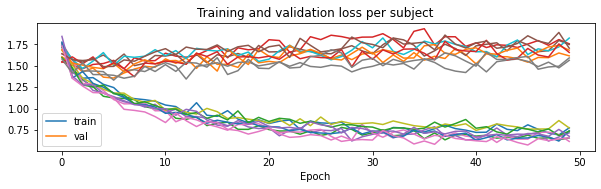

In [19]:
# Change to optimal learning rate for CNN-LSTM
learning_rate = 0.001 #lr

# Train CNN + LSTM NETWORK on each subject and see how the model for each subject 
# with test dataset from each subject
totalsub = 9
subject_validaccs = []
subject_testaccs = []
for sub in range(0, totalsub):
    train_dataset = torch.utils.data.TensorDataset(x_train[np.where(person_train_valid == sub)[0]], y_train[np.where(person_train_valid == sub)[0]])
    valid_dataset = torch.utils.data.TensorDataset(x_valid[np.where(person_train_valid == sub)[0]], y_valid[np.where(person_train_valid == sub)[0]])
    test_dataset  = torch.utils.data.TensorDataset(x_test[np.where(person_test == sub)[0]], y_test[np.where(person_test == sub)[0]])
    trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
    validloader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
    testloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
    model = CNN_LSTM(num_classes, input_size, hidden_size, num_layers, x_train.shape[1])
    criterion = torch.nn.CrossEntropyLoss()   # CE Loss is our softmax
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
    solver = Solver(num_epochs, model, optimizer, scheduler, criterion, verbose=True)
    solver.train(trainloader, validloader)
    subject_validaccs.append(solver.val_accuracy_history[-1])
    print("subject " + str(sub+1) + " validation accuracy: %1.5f"% (solver.val_accuracy_history[-1]))
    solver.test(testloader)
    subject_testaccs.append(solver.test_accuracy)
    print("subject " + str(sub+1) + " test accuracy: %1.5f"% (solver.test_accuracy))
    
    plt.subplot(3, 1, 1)
    plt.title('Training and validation loss per subject')
    plt.xlabel('Epoch')
    plt.subplot(3, 1, 1)
    plt.plot(solver.loss_history, label='training')
    plt.plot(solver.val_loss_history, label='validation')
    plt.legend(["train", "val"])

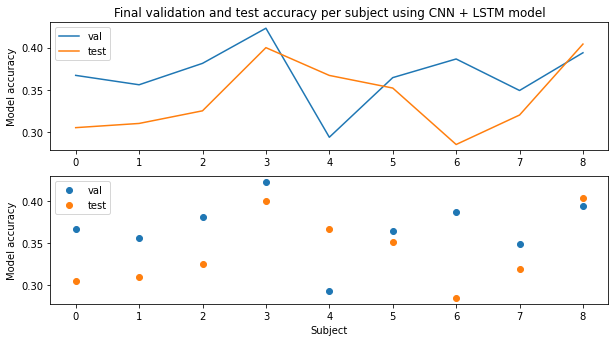

In [20]:
plt.subplot(3, 1, 1)
plt.title('Final validation and test accuracy per subject using CNN + LSTM model')
plt.ylabel('Model accuracy')
plt.subplot(3, 1, 1)
plt.plot(subject_validaccs, label='val')
plt.plot(subject_testaccs, label='test')
plt.legend(["val", "test"])
plt.subplot(3, 1, 2)
subjectnum = range(0, totalsub)
plt.scatter(subjectnum, subject_validaccs)
plt.scatter(subjectnum, subject_testaccs)
plt.xlabel('Subject')
plt.ylabel('Model accuracy')
plt.legend(["val", "test"])

cnnlstm_subject_validaccs = subject_validaccs.copy()
cnnlstm_subject_testaccs = subject_testaccs.copy()

In [26]:
print(cnn_subject_validaccs)
print(cnn_subject_testaccs)

[0.39662447257383965, 0.3305084745762712, 0.3644067796610169, 0.3974358974358974, 0.3404255319148936, 0.3305084745762712, 0.3949579831932773, 0.30603448275862066, 0.4588744588744589]
[0.32, 0.29, 0.39, 0.385, 0.324468085106383, 0.33163265306122447, 0.315, 0.415, 0.44680851063829785]


In [27]:
print(lstm_subject_validaccs)
print(lstm_subject_testaccs)

[0.3333333333333333, 0.2669491525423729, 0.3898305084745763, 0.358974358974359, 0.3021276595744681, 0.2966101694915254, 0.3907563025210084, 0.3793103448275862, 0.38961038961038963]
[0.315, 0.25, 0.245, 0.355, 0.24468085106382978, 0.32142857142857145, 0.345, 0.345, 0.25]


In [28]:
print(cnnlstm_subject_validaccs)
print(cnnlstm_subject_testaccs)

[0.3670886075949367, 0.3559322033898305, 0.3813559322033898, 0.4230769230769231, 0.2936170212765957, 0.3644067796610169, 0.3865546218487395, 0.34913793103448276, 0.3939393939393939]
[0.305, 0.31, 0.325, 0.4, 0.3670212765957447, 0.3520408163265306, 0.285, 0.32, 0.40425531914893614]


If we look at the classification accuracy of a single subject, in this case subject 1 (ID 0), the CNN model achieves the best validation and test accuracy.

## Classification Accuracy as function of time (III)

In [29]:
# define function that cuts data to specific time size but keeps same preprocessing
    
def preprocess_data(X_train_valid, y_train_valid, X_test,y_test, sub_sample, average,noise, trim_begin, trim_end, batch_size):
    X_train_valid_prep,y_train_valid_prep = data_prep(X_train_valid,y_train_valid,sub_sample,average, noise, trim_begin, trim_end)
    x_test, y_test = data_prep(X_test,y_test,sub_sample,average, noise, trim_begin, trim_end)

    ## Random splitting and reshaping the data

    # First generating the training and validation indices using random splitting
    ind_valid = np.random.choice(8460, 5000, replace=False)
    ind_train = np.array(list(set(range(8460)).difference(set(ind_valid))))

    # Creating the training and validation sets using the generated indices
    (x_train, x_valid) = X_train_valid_prep[ind_train], X_train_valid_prep[ind_valid] 
    (y_train, y_valid) = y_train_valid_prep[ind_train], y_train_valid_prep[ind_valid]

    # change to tensor
    x_train = Variable(torch.Tensor(x_train))
    x_valid = Variable(torch.Tensor(x_valid))
    x_test = Variable(torch.Tensor(x_test))

    y_train = Variable(torch.Tensor(y_train))
    y_train = torch.reshape(y_train,  (y_train.shape[0], 1)) 

    y_valid = Variable(torch.Tensor(y_valid))
    y_valid = torch.reshape(y_valid,  (y_valid.shape[0], 1)) 

    y_test = Variable(torch.Tensor(y_test))
    y_test = torch.reshape(y_test, (y_test.shape[0], 1))
    print("")
    print('final shape')
    print("Training Shape", x_train.shape, y_train.shape)
    print("Valid Shape", x_valid.shape, y_valid.shape)
    print("Test Shape", x_test.shape, y_test.shape)
    
    train_dataset = torch.utils.data.TensorDataset(x_train, y_train)
    valid_dataset = torch.utils.data.TensorDataset(x_valid, y_valid)
    test_dataset  = torch.utils.data.TensorDataset(x_test, y_test)
    
    trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
    validloader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
    testloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
    return trainloader, validloader, testloader, x_train
    
testing = preprocess_data(static_X_train_valid, static_y_train_valid, static_X_test,static_y_test, 2, 2,True, 0, 500, 64)


final shape
Training Shape torch.Size([3460, 22, 250]) torch.Size([3460, 1])
Valid Shape torch.Size([5000, 22, 250]) torch.Size([5000, 1])
Test Shape torch.Size([1772, 22, 250]) torch.Size([1772, 1])


In [30]:
num_epochs = 20 #epochs 
learning_rate = 0.001 #0.001 lr

input_size = 250 #number of features 
hidden_size = 128 #number of features in hidden state
num_layers = 1 #number of stacked lstm layers 

num_classes = 4 #number of output classes 
batch_size = 64 

In [32]:
timesteps_test = [100,200,300,400,500,600,700,800,900,1000]
val_accuracies = {}
test_accuracies = {}
losses = []

for timestep in timesteps_test:
    trainloader, validloader, testloader, x_train = preprocess_data(static_X_train_valid, static_y_train_valid, static_X_test,static_y_test, 2, 2,True, 0, timestep, 64)
    #define new model to fit data
    lstm1 = RNN(num_classes, timestep//2, hidden_size, num_layers, x_train.shape[1])
    criterion = torch.nn.CrossEntropyLoss()   # CE Loss is our softmax
    optimizer = torch.optim.Adam(lstm1.parameters(), lr=learning_rate)
    scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

    highest_val = 0
    loss_array = []
    for epoch in range(num_epochs):
      for i, data in enumerate(trainloader,0):
        inputs, labels = data
        outputs = lstm1.forward(inputs) #forward pass
        optimizer.zero_grad() #calculate the gradient, manually setting to 0
        loss = criterion(outputs, labels.reshape(labels.size(0),).type(torch.long))
        loss.backward() #calculates the loss of the loss function

        optimizer.step() #improve from loss, i.e backprop
        
      scheduler.step()
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))
      loss_array = np.append(loss_array, loss.item())  
      correct = 0
      total = 0
      with torch.no_grad():
        for data in validloader:
            inputs, labels = data
            outputs = lstm1(inputs)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels.reshape(labels.size(0),)).sum().item()
      print("  Val Accuracy: %1.5f"% (float(correct) / float(total)))
      if (float(correct) / float(total)) > highest_val:
          highest_val = (float(correct) / float(total))
    val_accuracies[timestep] = highest_val
    #test set
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            outputs = lstm1(inputs)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels.reshape(labels.size(0),)).sum().item()
        print("Test Accuracy: %1.5f"% (float(correct) / float(total)))
    test_accuracies[timestep] = (float(correct) / float(total))
    losses += [loss_array]


final shape
Training Shape torch.Size([3460, 22, 50]) torch.Size([3460, 1])
Valid Shape torch.Size([5000, 22, 50]) torch.Size([5000, 1])
Test Shape torch.Size([1772, 22, 50]) torch.Size([1772, 1])
Epoch: 0, loss: 1.34345
  Val Accuracy: 0.46940
Epoch: 1, loss: 0.21664
  Val Accuracy: 0.53800
Epoch: 2, loss: 0.66800
  Val Accuracy: 0.57200
Epoch: 3, loss: 1.73226
  Val Accuracy: 0.62320
Epoch: 4, loss: 0.42175
  Val Accuracy: 0.63280
Epoch: 5, loss: 1.75329
  Val Accuracy: 0.65380
Epoch: 6, loss: 0.64771
  Val Accuracy: 0.65220
Epoch: 7, loss: 0.10419
  Val Accuracy: 0.66780
Epoch: 8, loss: 0.58826
  Val Accuracy: 0.68220
Epoch: 9, loss: 0.15113
  Val Accuracy: 0.67660
Epoch: 10, loss: 1.18840
  Val Accuracy: 0.69500
Epoch: 11, loss: 0.02800
  Val Accuracy: 0.68640
Epoch: 12, loss: 0.70205
  Val Accuracy: 0.69240
Epoch: 13, loss: 2.46511
  Val Accuracy: 0.69380
Epoch: 14, loss: 1.16718
  Val Accuracy: 0.68940
Epoch: 15, loss: 0.74095
  Val Accuracy: 0.69360
Epoch: 16, loss: 4.00365
  V

  Val Accuracy: 0.74800
Epoch: 18, loss: 0.00082
  Val Accuracy: 0.74460
Epoch: 19, loss: 0.21842
  Val Accuracy: 0.74460
Test Accuracy: 0.29684

final shape
Training Shape torch.Size([3460, 22, 400]) torch.Size([3460, 1])
Valid Shape torch.Size([5000, 22, 400]) torch.Size([5000, 1])
Test Shape torch.Size([1772, 22, 400]) torch.Size([1772, 1])
Epoch: 0, loss: 1.19412
  Val Accuracy: 0.56180
Epoch: 1, loss: 0.71098
  Val Accuracy: 0.68200
Epoch: 2, loss: 0.72033
  Val Accuracy: 0.73240
Epoch: 3, loss: 0.21858
  Val Accuracy: 0.74260
Epoch: 4, loss: 0.00931
  Val Accuracy: 0.75000
Epoch: 5, loss: 0.71161
  Val Accuracy: 0.75400
Epoch: 6, loss: 0.04208
  Val Accuracy: 0.74140
Epoch: 7, loss: 0.68778
  Val Accuracy: 0.75260
Epoch: 8, loss: 0.00015
  Val Accuracy: 0.75380
Epoch: 9, loss: 0.04645
  Val Accuracy: 0.75300
Epoch: 10, loss: 0.10859
  Val Accuracy: 0.76000
Epoch: 11, loss: 0.04322
  Val Accuracy: 0.76220
Epoch: 12, loss: 0.18210
  Val Accuracy: 0.76220
Epoch: 13, loss: 0.01985
  

In [33]:
print("Validation accuracies as function of time", val_accuracies)
print("")
print("Test accuracies as function of time", test_accuracies)

Validation accuracies as function of time {100: 0.6954, 200: 0.7284, 300: 0.746, 400: 0.7546, 500: 0.755, 600: 0.75, 700: 0.7484, 800: 0.7632, 900: 0.7448, 1000: 0.7572}

Test accuracies as function of time {100: 0.3261851015801354, 200: 0.30191873589164786, 300: 0.31038374717832956, 400: 0.3177200902934537, 500: 0.27878103837471785, 600: 0.29401805869074493, 700: 0.29683972911963885, 800: 0.3002257336343115, 900: 0.30248306997742663, 1000: 0.3278781038374718}


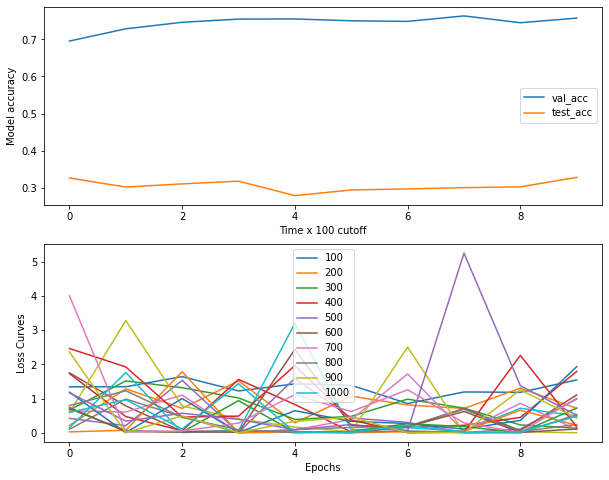

In [34]:
plt.subplot(2,1,1)
plt.plot(val_accuracies.values())
plt.plot(test_accuracies.values())
plt.xlabel('Time x 100 cutoff')
plt.ylabel('Model accuracy')
plt.legend(["val_acc", "test_acc"])
plt.subplot(2,1,2)
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss Curves')
plt.legend(["100", "200", "300", "400", "500", "600", "700", "800", "900", "1000"])
# plt.plot(losses)

0-700 timesteps had the highest classification accuracy on test data and 0-1000 timesteps had highest classification accuracy on validation data

# Optimizing Classification across all subjects

In this section we will be tuning the hyperparameters of our nerual nets across all subjects. We will examine any interesting trends.

In [10]:
num_epochs = 50 #epochs 
learning_rate = 0.001 #0.0001 lr for LSTM only

input_size = 250 #number of features 
hidden_size = 128 #number of features in hidden state
num_layers = 1 #number of stacked lstm layers 

num_classes = 4 #number of output classes 
batch_size = 64 

In [11]:
# Create Torch Itterables
train_dataset = torch.utils.data.TensorDataset(x_train, y_train)
valid_dataset = torch.utils.data.TensorDataset(x_valid, y_valid)
test_dataset  = torch.utils.data.TensorDataset(x_test, y_test)
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
validloader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)


In [12]:
# Create Filtered Torch Itterables
filtered_train_dataset = torch.utils.data.TensorDataset(x_train_den, y_train_den)
filtered_valid_dataset = torch.utils.data.TensorDataset(x_valid_den, y_valid_den)
filtered_test_dataset  = torch.utils.data.TensorDataset(x_test_den, y_test_den)
filtered_trainloader = torch.utils.data.DataLoader(filtered_train_dataset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
filtered_validloader = torch.utils.data.DataLoader(filtered_valid_dataset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
filtered_testloader = torch.utils.data.DataLoader(filtered_test_dataset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

In [13]:
# Create CNN, classifier, and optimizer
cnn_only = CNN(num_classes, input_size, hidden_size, num_layers, x_train.shape[1])
cnn_criterion = torch.nn.CrossEntropyLoss()   # CE Loss is our softmax
cnn_optimizer = torch.optim.Adam(cnn_only.parameters(), lr=learning_rate)
cnn_scheduler = torch.optim.lr_scheduler.ExponentialLR(cnn_optimizer, gamma=0.9)

# Create CNN, classifier, and optimizer for filtered data comparrison
cnn_only_filt = CNN(num_classes, input_size, hidden_size, num_layers, x_train.shape[1])
cnn_filt_criterion = torch.nn.CrossEntropyLoss()   # CE Loss is our softmax
cnn_filt_optimizer = torch.optim.Adam(cnn_only_filt.parameters(), lr=learning_rate)
cnn_filt_scheduler = torch.optim.lr_scheduler.ExponentialLR(cnn_filt_optimizer, gamma=0.9)

# Create RNN, classifier, and optimizer
rnn_only = RNN(num_classes, input_size, hidden_size, num_layers, x_train.shape[1])
rnn_criterion = torch.nn.CrossEntropyLoss()   # CE Loss is our softmax
rnn_optimizer = torch.optim.Adam(rnn_only.parameters(), lr=learning_rate)
rnn_scheduler = torch.optim.lr_scheduler.ExponentialLR(rnn_optimizer, gamma=0.9)

# Create RNN, classifier, and optimizer for filtered data comparrison
rnn_only_filt = RNN(num_classes, input_size, hidden_size, num_layers, x_train.shape[1])
rnn_filt_criterion = torch.nn.CrossEntropyLoss()   # CE Loss is our softmax
rnn_filt_optimizer = torch.optim.Adam(rnn_only_filt.parameters(), lr=learning_rate)
rnn_filt_scheduler = torch.optim.lr_scheduler.ExponentialLR(rnn_filt_optimizer, gamma=0.9)

# Create CNN-LSTM, classifier, and optimizer
cnn_lstm = CNN_LSTM(num_classes, input_size, hidden_size, num_layers, x_train.shape[1])
cnn_lstm_criterion = torch.nn.CrossEntropyLoss()   # CE Loss is our softmax
cnn_lstm_optimizer = torch.optim.Adam(cnn_lstm.parameters(), lr=learning_rate)
cnn_lstm_scheduler = torch.optim.lr_scheduler.ExponentialLR(cnn_lstm_optimizer, gamma=0.9)

# Create CNN-LSTM, classifier, and optimizer for filtered data comparrison
cnn_lstm_filt = CNN_LSTM(num_classes, input_size, hidden_size, num_layers, x_train.shape[1])
cnn_lstm_filt_criterion = torch.nn.CrossEntropyLoss()   # CE Loss is our softmax
cnn_lstm_filt_optimizer = torch.optim.Adam(cnn_lstm_filt.parameters(), lr=learning_rate)
cnn_lstm_filt_scheduler = torch.optim.lr_scheduler.ExponentialLR(cnn_lstm_filt_optimizer, gamma=0.9)

In [14]:
# Train CNN 
cnn_solver = Solver(num_epochs, cnn_only,cnn_optimizer, cnn_scheduler, cnn_criterion, verbose=False )
cnn_solver.train(trainloader, validloader)
print("CNN Training Done!")

# Train RNN
rnn_solver = Solver(num_epochs, rnn_only,rnn_optimizer, rnn_scheduler, rnn_criterion, verbose=False, cnn_reshape=False )
rnn_solver.train(trainloader, validloader)
print("RNN Training Done!")

# Train CNN-LSTM
cnn_lstm_solver = Solver(num_epochs, cnn_lstm,cnn_lstm_optimizer, cnn_lstm_scheduler, cnn_lstm_criterion, verbose=False )
cnn_lstm_solver.train(trainloader, validloader)
print("CNN-LSTM Training Done!")

# Train CNN on filtered Data
cnn_filt_solver = Solver(num_epochs, cnn_only_filt,cnn_filt_optimizer, cnn_filt_scheduler, cnn_filt_criterion, verbose=False )
cnn_filt_solver.train(filtered_trainloader, filtered_validloader)
print("CNN Training on Filtered Data Done!")

# Train RNN on filtered Data
rnn_filt_solver = Solver(num_epochs, rnn_only_filt,rnn_filt_optimizer, rnn_filt_scheduler, rnn_filt_criterion, verbose=False, cnn_reshape=False )
rnn_filt_solver.train(filtered_trainloader, filtered_validloader)
print("RNN Training on Filtered Data Done!")

# Train CNN-LSTM on filtered Data
cnn_lstm_filt_solver = Solver(num_epochs, cnn_lstm_filt,cnn_lstm_filt_optimizer, cnn_lstm_filt_scheduler, cnn_lstm_filt_criterion, verbose=False )
cnn_lstm_filt_solver.train(filtered_trainloader, filtered_validloader)
print("CNN-LSTM Training on Filtered Data Done!")


CNN Training Done!
RNN Training Done!
CNN-LSTM Training Done!
CNN Training on Filtered Data Done!
RNN Training on Filtered Data Done!
CNN-LSTM Training on Filtered Data Done!


Text(0.5, 1.0, 'CNN Accuracy Over Training')

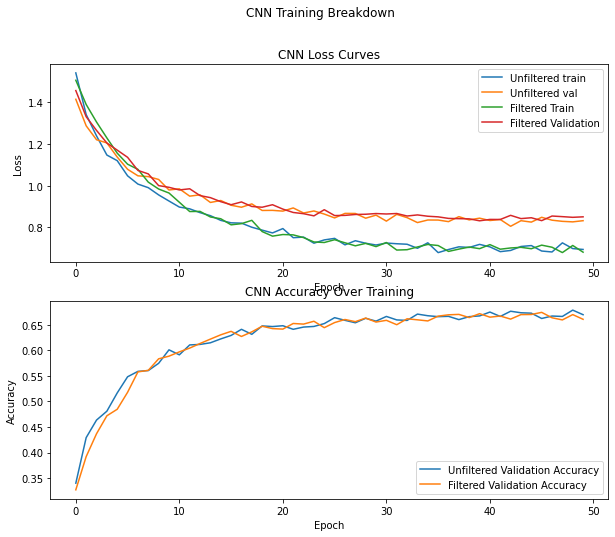

In [15]:
# Plot CNN Results
fig, axs = plt.subplots(2)
fig.suptitle('CNN Training Breakdown')
axs[0].plot(cnn_solver.loss_history)
axs[0].plot(cnn_solver.val_loss_history)
axs[0].plot(cnn_filt_solver.loss_history)
axs[0].plot(cnn_filt_solver.val_loss_history)
axs[0].legend(["Unfiltered train", "Unfiltered val", "Filtered Train", "Filtered Validation"])
axs[0].set_ylabel("Loss")
axs[0].set_xlabel("Epoch")
axs[0].set_title("CNN Loss Curves")
axs[1].plot(cnn_solver.val_accuracy_history)
axs[1].plot(cnn_filt_solver.val_accuracy_history)
axs[1].legend(["Unfiltered Validation Accuracy", "Filtered Validation Accuracy"])
axs[1].set_ylabel("Accuracy")
axs[1].set_xlabel("Epoch")
axs[1].set_title("CNN Accuracy Over Training")

Text(0.5, 1.0, 'RNN Accuracy Over Training')

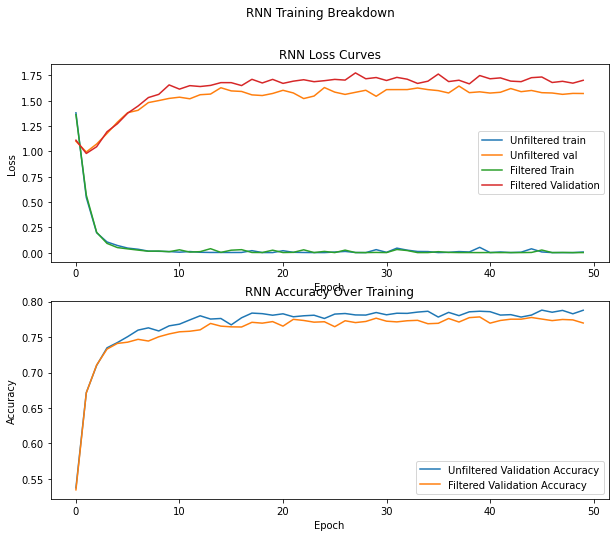

In [16]:
# Plot RNN Results
fig, axs = plt.subplots(2)
fig.suptitle('RNN Training Breakdown')
axs[0].plot(rnn_solver.loss_history)
axs[0].plot(rnn_solver.val_loss_history)
axs[0].plot(rnn_filt_solver.loss_history)
axs[0].plot(rnn_filt_solver.val_loss_history)
axs[0].legend(["Unfiltered train", "Unfiltered val", "Filtered Train", "Filtered Validation"])
axs[0].set_ylabel("Loss")
axs[0].set_xlabel("Epoch")
axs[0].set_title("RNN Loss Curves")
axs[1].plot(rnn_solver.val_accuracy_history)
axs[1].plot(rnn_filt_solver.val_accuracy_history)
axs[1].legend(["Unfiltered Validation Accuracy", "Filtered Validation Accuracy"])
axs[1].set_ylabel("Accuracy")
axs[1].set_xlabel("Epoch")
axs[1].set_title("RNN Accuracy Over Training")

Text(0.5, 1.0, 'CNN-LSTM Accuracy Over Training')

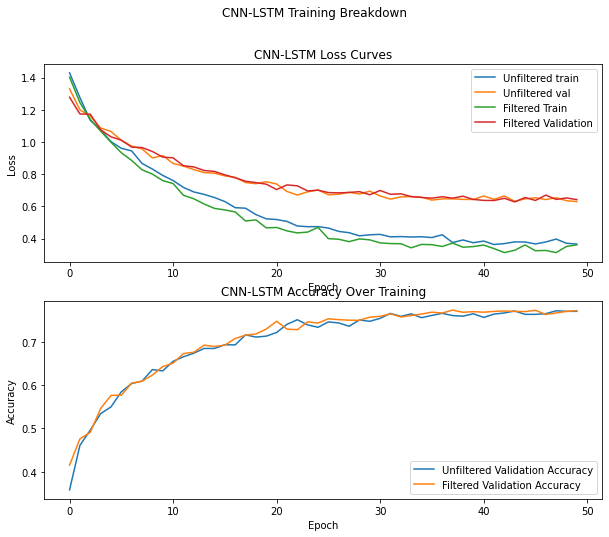

In [17]:
# Plot CNN-LSTM Results
fig, axs = plt.subplots(2)
fig.suptitle('CNN-LSTM Training Breakdown')
axs[0].plot(cnn_lstm_solver.loss_history)
axs[0].plot(cnn_lstm_solver.val_loss_history)
axs[0].plot(cnn_lstm_filt_solver.loss_history)
axs[0].plot(cnn_lstm_filt_solver.val_loss_history)
axs[0].legend(["Unfiltered train", "Unfiltered val", "Filtered Train", "Filtered Validation"])
axs[0].set_ylabel("Loss")
axs[0].set_xlabel("Epoch")
axs[0].set_title("CNN-LSTM Loss Curves")
axs[1].plot(cnn_lstm_solver.val_accuracy_history)
axs[1].plot(cnn_lstm_filt_solver.val_accuracy_history)
axs[1].legend(["Unfiltered Validation Accuracy", "Filtered Validation Accuracy"])
axs[1].set_ylabel("Accuracy")
axs[1].set_xlabel("Epoch")
axs[1].set_title("CNN-LSTM Accuracy Over Training")

In [18]:
cnn_accuracy = cnn_solver.test(testloader)
print("CNN Test Accuracy: %1.5f"% (cnn_accuracy))
cnn_filt_accuracy = cnn_filt_solver.test(filtered_testloader)
print("CNN Test Accuracy(Filtered): %1.5f"% (cnn_filt_accuracy))
rnn_accuracy = rnn_solver.test(testloader)
print("RNN Test Accuracy: %1.5f"% (rnn_accuracy))
rnn_filt_accuracy = rnn_filt_solver.test(filtered_testloader)
print("RNN Test Accuracy(Filtered): %1.5f"% (rnn_filt_accuracy))
cnn_lstm_accuracy = cnn_lstm_solver.test(testloader)
print("CNN-LSTM Test Accuracy: %1.5f"% (cnn_lstm_accuracy))
cnn_lstm_filt_accuracy = cnn_lstm_filt_solver.test(filtered_testloader)
print("CNN-LSTM Test Accuracy(Filtered): %1.5f"% (cnn_lstm_filt_accuracy))

CNN Test Accuracy: 0.56490
CNN Test Accuracy(Filtered): 0.59989
RNN Test Accuracy: 0.34819
RNN Test Accuracy(Filtered): 0.32449
CNN-LSTM Test Accuracy: 0.56941
CNN-LSTM Test Accuracy(Filtered): 0.56603


Text(0.5, 0, 'Subject Index')

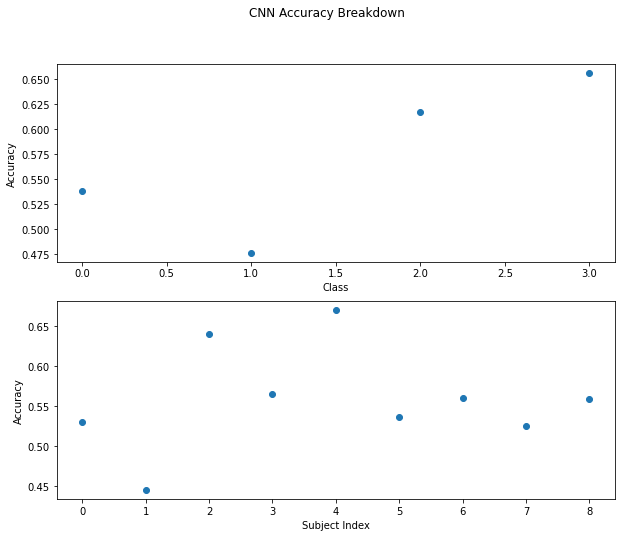

In [19]:
# CNN Test Accuracy Breakdown
totalsub=9
CNN_accuracy_by_class = cnn_solver.test_by_class(testloader)
CNN_accuracy_by_patient = np.zeros(totalsub)

# Patient Accuracies
for sub in range(totalsub):
    # Partition Test set by patient number
    sub_test_dataset  = torch.utils.data.TensorDataset(x_test[np.where(person_test == sub)[0]], y_test[np.where(person_test == sub)[0]])
    sub_testloader = torch.utils.data.DataLoader(sub_test_dataset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
    CNN_accuracy_by_patient[sub] = cnn_solver.test(sub_testloader)
fig, axs = plt.subplots(2)
fig.suptitle('CNN Accuracy Breakdown')
axs[0].scatter(np.arange(num_classes),CNN_accuracy_by_class)
axs[0].set_ylabel("Accuracy")
axs[0].set_xlabel("Class")
axs[1].scatter(np.arange(totalsub),CNN_accuracy_by_patient)
axs[1].set_ylabel("Accuracy")
axs[1].set_xlabel("Subject Index")

Text(0.5, 0, 'Subject Index')

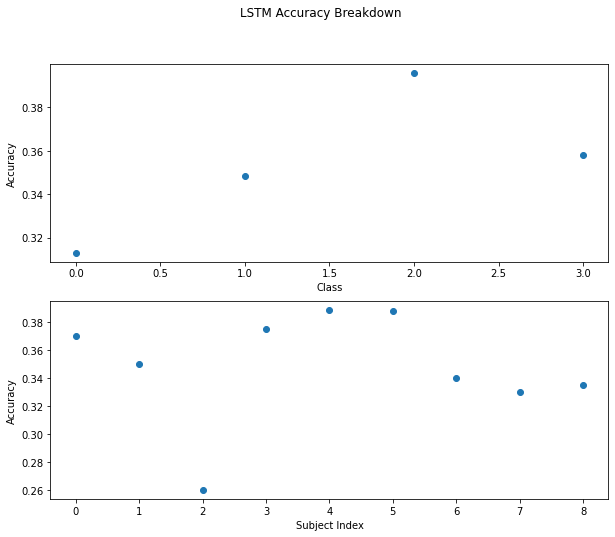

In [20]:
# RNN Test Accuracy Breakdown
totalsub=9
RNN_accuracy_by_class = rnn_solver.test_by_class(testloader)
RNN_accuracy_by_patient = np.zeros(totalsub)

# Patient Accuracies
for sub in range(totalsub):
    # Partition Test set by patient number
    sub_test_dataset  = torch.utils.data.TensorDataset(x_test[np.where(person_test == sub)[0]], y_test[np.where(person_test == sub)[0]])
    sub_testloader = torch.utils.data.DataLoader(sub_test_dataset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
    RNN_accuracy_by_patient[sub] = rnn_solver.test(sub_testloader)
fig, axs = plt.subplots(2)
fig.suptitle('LSTM Accuracy Breakdown')

axs[0].scatter(np.arange(num_classes),RNN_accuracy_by_class)
axs[0].set_ylabel("Accuracy")
axs[0].set_xlabel("Class")
axs[1].scatter(np.arange(totalsub),RNN_accuracy_by_patient)
axs[1].set_ylabel("Accuracy")
axs[1].set_xlabel("Subject Index")

Text(0.5, 0, 'Subject Index')

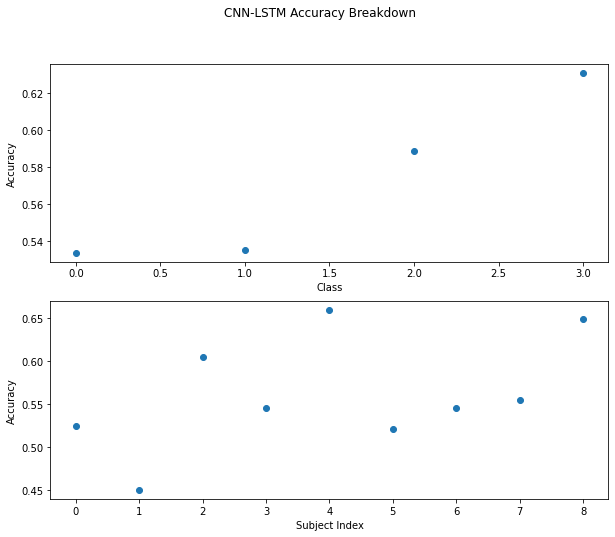

In [21]:
# CNN-LSTM Test Accuracy Breakdown
totalsub=9
CNN_LSTM_accuracy_by_class = cnn_lstm_solver.test_by_class(testloader)
CNN_LSTM_accuracy_by_patient = np.zeros(totalsub)

# Patient Accuracies
for sub in range(totalsub):
    # Partition Test set by patient number
    sub_test_dataset  = torch.utils.data.TensorDataset(x_test[np.where(person_test == sub)[0]], y_test[np.where(person_test == sub)[0]])
    sub_testloader = torch.utils.data.DataLoader(sub_test_dataset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
    CNN_LSTM_accuracy_by_patient[sub] = cnn_lstm_solver.test(sub_testloader)
fig, axs = plt.subplots(2)
fig.suptitle('CNN-LSTM Accuracy Breakdown')
axs[0].scatter(np.arange(num_classes),CNN_LSTM_accuracy_by_class)
axs[0].set_ylabel("Accuracy")
axs[0].set_xlabel("Class")
axs[1].scatter(np.arange(totalsub),CNN_LSTM_accuracy_by_patient)
axs[1].set_ylabel("Accuracy")
axs[1].set_xlabel("Subject Index")

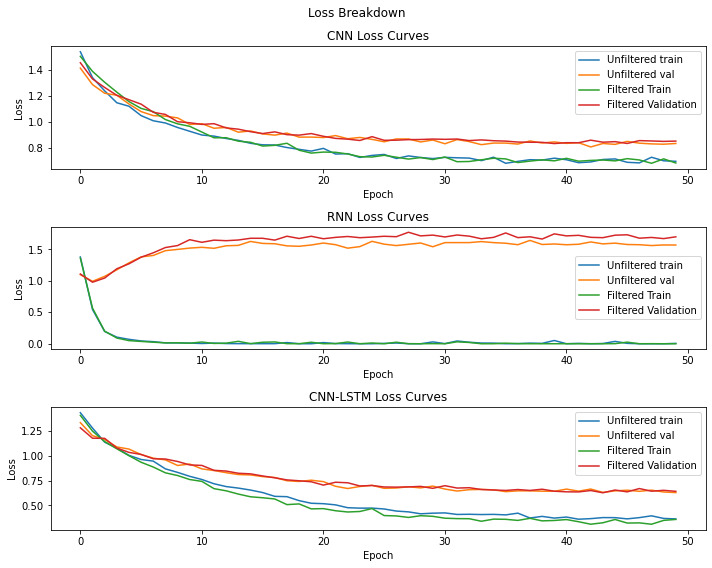

In [22]:
fig, axs = plt.subplots(3)
fig.suptitle('Loss Breakdown')
axs[2].plot(cnn_lstm_solver.loss_history)
axs[2].plot(cnn_lstm_solver.val_loss_history)
axs[2].plot(cnn_lstm_filt_solver.loss_history)
axs[2].plot(cnn_lstm_filt_solver.val_loss_history)
axs[2].legend(["Unfiltered train", "Unfiltered val", "Filtered Train", "Filtered Validation"])
axs[2].set_ylabel("Loss")
axs[2].set_xlabel("Epoch")
axs[2].set_title("CNN-LSTM Loss Curves")

# Plot RNN Results
axs[1].plot(rnn_solver.loss_history)
axs[1].plot(rnn_solver.val_loss_history)
axs[1].plot(rnn_filt_solver.loss_history)
axs[1].plot(rnn_filt_solver.val_loss_history)
axs[1].legend(["Unfiltered train", "Unfiltered val", "Filtered Train", "Filtered Validation"])
axs[1].set_ylabel("Loss")
axs[1].set_xlabel("Epoch")
axs[1].set_title("RNN Loss Curves")

# Plot CNN Results
axs[0].plot(cnn_solver.loss_history)
axs[0].plot(cnn_solver.val_loss_history)
axs[0].plot(cnn_filt_solver.loss_history)
axs[0].plot(cnn_filt_solver.val_loss_history)
axs[0].legend(["Unfiltered train", "Unfiltered val", "Filtered Train", "Filtered Validation"])
axs[0].set_ylabel("Loss")
axs[0].set_xlabel("Epoch")
axs[0].set_title("CNN Loss Curves")
plt.tight_layout()


CNN Max Validation Accuracy:           0.67900
CNN Max Validation Accuracy(Filtered): 0.67460
RNN Max Validation Accuracy:           0.78800
RNN Max Validation Accuracy(Filtered): 0.77840
CNN-LSTM Max Validation Accuracy          : 0.77120
CNN-LSTM Max Validation Accuracy(Filtered): 0.77280


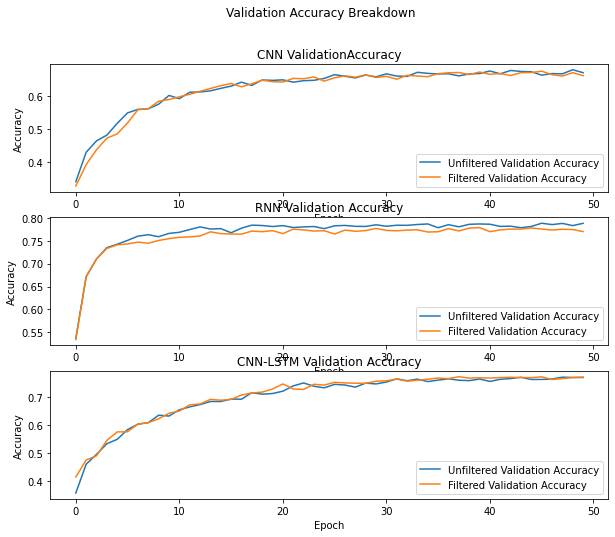

In [23]:
# Plot CNN Results
fig, axs = plt.subplots(3)
fig.suptitle('Validation Accuracy Breakdown')

axs[0].plot(cnn_solver.val_accuracy_history)
axs[0].plot(cnn_filt_solver.val_accuracy_history)
axs[0].legend(["Unfiltered Validation Accuracy", "Filtered Validation Accuracy"])
axs[0].set_ylabel("Accuracy")
axs[0].set_xlabel("Epoch")
axs[0].set_title("CNN ValidationAccuracy")

# Plot RNN Results

axs[1].plot(rnn_solver.val_accuracy_history)
axs[1].plot(rnn_filt_solver.val_accuracy_history)
axs[1].legend(["Unfiltered Validation Accuracy", "Filtered Validation Accuracy"])
axs[1].set_ylabel("Accuracy")
axs[1].set_xlabel("Epoch")
axs[1].set_title("RNN Validation Accuracy")

# Plot CNN-LSTM Results

axs[2].plot(cnn_lstm_solver.val_accuracy_history)
axs[2].plot(cnn_lstm_filt_solver.val_accuracy_history)
axs[2].legend(["Unfiltered Validation Accuracy", "Filtered Validation Accuracy"])
axs[2].set_ylabel("Accuracy")
axs[2].set_xlabel("Epoch")
axs[2].set_title("CNN-LSTM Validation Accuracy")

print("CNN Max Validation Accuracy:           %1.5f"% (np.max(cnn_solver.val_accuracy_history)))
print("CNN Max Validation Accuracy(Filtered): %1.5f"% (np.max(cnn_filt_solver.val_accuracy_history)))
print("RNN Max Validation Accuracy:           %1.5f"% (np.max(rnn_solver.val_accuracy_history)))
print("RNN Max Validation Accuracy(Filtered): %1.5f"% (np.max(rnn_filt_solver.val_accuracy_history)))
print("CNN-LSTM Max Validation Accuracy          : %1.5f"% (np.max(cnn_lstm_solver.val_accuracy_history)))
print("CNN-LSTM Max Validation Accuracy(Filtered): %1.5f"% (np.max(cnn_lstm_filt_solver.val_accuracy_history)))


# Architecture validation

In [24]:
# Compare CNN to CNN-LSTM
cnn_accs = []
cnn_lstm_accs = []
for i in range(10):
    all_subjects_net_cnn = CNN(num_classes, input_size, hidden_size, num_layers, x_train.shape[1])
    all_subjects_net = CNN_LSTM(num_classes, input_size, hidden_size, num_layers, x_train.shape[1])
    criterion = torch.nn.CrossEntropyLoss()   # CE Loss is our softmax
    optimizer = torch.optim.Adam(all_subjects_net.parameters(), lr=learning_rate)
    scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
    criterion1 = torch.nn.CrossEntropyLoss()   # CE Loss is our softmax
    optimizer1 = torch.optim.Adam(all_subjects_net_cnn.parameters(), lr=learning_rate)
    scheduler1 = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
    
    solver = Solver(num_epochs, all_subjects_net,optimizer, scheduler, criterion, verbose=True )
    solver.train(trainloader, validloader)
    solver1 = Solver(num_epochs, all_subjects_net_cnn,optimizer1, scheduler1, criterion1, verbose=True )
    solver1.train(trainloader, validloader)

    cnn_accs.append(solver1.test(testloader))
    cnn_lstm_accs.append(solver.test(testloader))

print(np.mean(cnn_accs))
print(np.mean(cnn_lstm_accs))

Epoch: 0, loss: 1.40436
  Val Accuracy: 0.39780
Epoch: 1, loss: 1.22929
  Val Accuracy: 0.45060
Epoch: 2, loss: 1.14145
  Val Accuracy: 0.48320
Epoch: 3, loss: 1.06789
  Val Accuracy: 0.52920
Epoch: 4, loss: 1.01192
  Val Accuracy: 0.55500
Epoch: 5, loss: 0.93630
  Val Accuracy: 0.58600


Traceback (most recent call last):
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "<string>", line 1, in <module>
  File "//anaconda3/envs/EEG_RNN/lib/python3.9/multiprocessing/spawn.py", line 116, in spawn_main
    exitcode = _main(fd, parent_sentinel)
  File "//anaconda3/envs/EEG_RNN/lib/python3.9/multiprocessing/spawn.py", line 116, in spawn_main
  File "//anaconda3/envs/EEG_RNN/lib/python3.9/multiprocessing/spawn.py", line 126, in _main
    self = reduction.pickle.load(from_parent)
  File "//anaconda3/envs/EEG_RNN/lib/python3.9/site-packages/torch/__init__.py", line 720, in <module>
    exitcode = _main(fd, parent_sentinel)
  File "//anaconda3/envs/EEG_RNN/lib/python3.9/multiprocessing/spawn.py", line 126, in _main
    self = reduction.pickle.load(from_parent)
  File "//anaconda3/envs/EEG_RNN/lib/python3.9/site-packages/torch/__init__.py", line 720, in <module>
    from torch import quantization as quantization
  File "//anaconda3/envs/EEG_RNN/lib/

KeyboardInterrupt: 

In [ ]:
    all_subjects_net_cnn = CNN(num_classes, input_size, hidden_size, num_layers, x_train.shape[1])
    all_subjects_net = CNN_LSTM(num_classes, input_size, hidden_size, num_layers, x_train.shape[1])
    criterion = torch.nn.CrossEntropyLoss()   # CE Loss is our softmax
    optimizer = torch.optim.Adam(all_subjects_net.parameters(), lr=learning_rate)
    scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
    criterion1 = torch.nn.CrossEntropyLoss()   # CE Loss is our softmax
    optimizer1 = torch.optim.Adam(all_subjects_net_cnn.parameters(), lr=learning_rate)
    scheduler1 = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
    
    solver = Solver(50, all_subjects_net,optimizer, scheduler, criterion, verbose=False )
    solver.train(trainloader, validloader)
    solver1 = Solver(50, all_subjects_net_cnn,optimizer1, scheduler1, criterion1, verbose=False )
    solver1.train(trainloader, validloader)

    cnn_acc = solver1.test(testloader)
    cnn_lstm_acc = solver.test(testloader)
    print("CNN Accuracy: %1.5f"% (cnn_acc))
    print("CNN_LSTM Accuracy: %1.5f"% (cnn_lstm_acc))

In [ ]:
plt.plot(solver.loss_history)
plt.plot(solver.val_loss_history)
plt.legend(["train", "val"])

In [ ]:
plt.plot(solver1.loss_history)
plt.plot(solver1.val_loss_history)
plt.legend(["train", "val"])